In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2.extras

In [2]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database = "ecomdb",
                                                  user = "postgres",
                                                  password = "sultanmahmud22",
                                                  host = "127.0.0.1",
                                                  port= "5432")
    def getConnection(self):
        print("Successfully connected to the database")
        return self.connection
con = PostgresConnection().getConnection()

Successfully connected to the database


In [3]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.division, tim.month, tim.year,  SUM(t.total_price) " \
"FROM star_schema.fact_table t  " \
"JOIN star_schema.store_dim s on s.store_key = t.store_key " \
"JOIN star_schema.time_dim tim on tim.time_key = t.time_key " \
"GROUP BY CUBE(s.division, tim.month, tim.year) " \
"ORDER BY tim.year "
#" WHERE s.division = 'DHAKA' OR s.division = 'KHULNA'" \
cur.execute(select_stmt)
records = cur.fetchall()
records

df = pd.DataFrame(list(records), columns = ['Division','Month', 'Year','Sales'])
df = df.dropna()
df

Successfully connected to the database


,Division,Month,Year,Sales
0,CHITTAGONG,5.0,2014.0,241190.50
1,RANGPUR,4.0,2014.0,99408.25
2,RANGPUR,6.0,2014.0,95818.50
4,DHAKA,2.0,2014.0,437600.25
5,BARISAL,5.0,2014.0,91061.50
...,...,...,...,...
738,KHULNA,1.0,2021.0,93758.00
739,BARISAL,1.0,2021.0,64801.25
741,RANGPUR,1.0,2021.0,71583.50
742,DHAKA,1.0,2021.0,341020.50


In [23]:
#df = df.iloc[:, :].values

In [29]:
from sklearn.preprocessing import LabelEncoder
division=LabelEncoder()
df['Division']=division.fit_transform(df['Division'])
df

,Division,Month,Year,Sales
0,1,5.0,2014.0,241190.50
1,5,4.0,2014.0,99408.25
2,5,6.0,2014.0,95818.50
3,2,2.0,2014.0,437600.25
4,0,5.0,2014.0,91061.50
...,...,...,...,...
590,3,1.0,2021.0,93758.00
591,0,1.0,2021.0,64801.25
592,5,1.0,2021.0,71583.50
593,2,1.0,2021.0,341020.50


In [30]:
X = df.iloc[:, [1,2]].values
Y = df.iloc[:, 0].values

## Splitting dataset into Trainig and Testing set

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [32]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [33]:
# from sklearn.linear_model import LogisticRegression
# classifier = LogisticRegression(random_state = 0)
# classifier.fit(X_train, Y_train)

In [34]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
classifier.fit(X_train, Y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [35]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 4, 3, 4, 4, 1, 1, 1, 4, 4, 4, 0, 1, 4, 1, 3, 1, 4, 4, 0, 1, 4,
       4, 4, 1, 4, 4, 4, 0, 3, 4, 0, 4, 4, 3, 1, 4, 3, 4, 0, 4, 0, 4, 4,
       4, 3, 1, 4, 0, 3, 4, 0, 4, 4, 0, 3, 3, 3, 4, 4, 1, 4, 3, 0, 4, 4,
       4, 4, 1, 4, 0, 4, 1, 3, 4, 4, 1, 4, 3, 3, 1, 4, 1, 1, 4, 3, 4, 3,
       1, 3, 4, 4, 3, 3, 4, 4, 1, 3, 3, 4, 0, 1, 1, 3, 4, 4, 0, 1, 4, 1,
       3, 3, 4, 1, 1, 4, 4, 1, 4, 4, 1, 1, 4, 4, 4, 0, 0, 3, 4, 3, 1, 4,
       1, 1, 4, 0, 4, 1, 3, 0, 4, 4, 4, 4, 4, 1, 1, 4, 1], dtype=int64)

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
cm

array([[ 1,  7,  0,  2, 10,  0,  0],
       [ 1,  4,  0,  1, 13,  0,  0],
       [ 5,  6,  0,  6,  8,  0,  0],
       [ 5,  1,  0,  3, 11,  0,  0],
       [ 2,  4,  0,  5,  5,  0,  0],
       [ 3,  6,  0,  5, 11,  0,  0],
       [ 1,  7,  0,  5, 11,  0,  0]], dtype=int64)

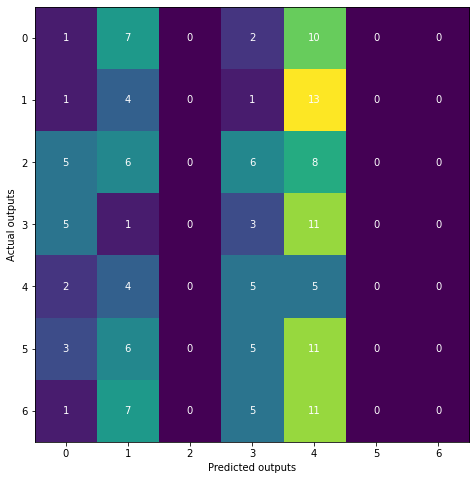

In [38]:
cm = confusion_matrix(Y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs',  color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(7))
ax.yaxis.set(ticks=range(7))
ax.set_ylim(6.5, -0.5)
for i in range(7):
    for j in range(7):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [39]:
from sklearn.metrics import classification_report
report = classification_report(Y_test, y_pred)
report

C:\Users\Nayan\Desktop\myenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nayan\Desktop\myenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nayan\Desktop\myenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.06      0.05      0.05        20\n           1       0.11      0.21      0.15        19\n           2       0.00      0.00      0.00        25\n           3       0.11      0.15      0.13        20\n           4       0.07      0.31      0.12        16\n           5       0.00      0.00      0.00        25\n           6       0.00      0.00      0.00        24\n\n    accuracy                           0.09       149\n   macro avg       0.05      0.10      0.06       149\nweighted avg       0.04      0.09      0.06       149\n'

In [40]:
from sklearn.metrics import classification_report
report = classification_report(Y_test, y_pred)
print('report:', report, sep='\n')

report:
              precision    recall  f1-score   support

           0       0.06      0.05      0.05        20
           1       0.11      0.21      0.15        19
           2       0.00      0.00      0.00        25
           3       0.11      0.15      0.13        20
           4       0.07      0.31      0.12        16
           5       0.00      0.00      0.00        25
           6       0.00      0.00      0.00        24

    accuracy                           0.09       149
   macro avg       0.05      0.10      0.06       149
weighted avg       0.04      0.09      0.06       149



C:\Users\Nayan\Desktop\myenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nayan\Desktop\myenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nayan\Desktop\myenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
mlr_diff = pd.DataFrame({'Actual value': Y_test, 'Predicted value': y_pred})
mlr_diff.head(20)

,Actual value,Predicted value
0,5,0
1,4,4
2,6,3
3,2,4
4,3,4
5,2,1
6,1,1
7,0,1
8,5,4
9,0,4


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

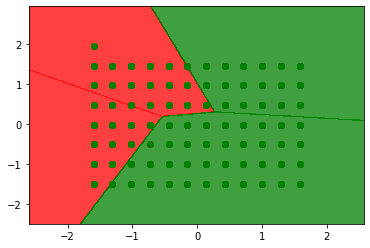

In [48]:
from  matplotlib.colors import ListedColormap
X_set , Y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min()-1, stop = X_set[:, 0].max()+1, step = 0.01),
                    np.arange(X_set[:, 1].min()-1, stop = X_set[:, 1].max()+1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], 
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.show()